# Learning objectives

1. Introduce pandas
1. More matplotlib

# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load K4me3.bed

In [2]:
bed_columns = ["chr", "start", "end"]
df_k4 = pd.read_table( "../../qbb2020/data/K4me3.bed", names=bed_columns )
df_k4

,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
...,...,...,...
3825,3R,565835,566082
3826,2L,10439373,10442085
3827,3R,4477321,4479529
3828,3L,711347,711871


In [3]:
type( df_k4 )

pandas.core.frame.DataFrame

# Work with data frames

In [4]:
df_k4.columns

Index(['chr', 'start', 'end'], dtype='object')

In [5]:
df_k4.index

RangeIndex(start=0, stop=3830, step=1)

In [6]:
df_k4.values

array([['3L', 15823270, 15830715],
       ['2R', 11451787, 11459612],
       ['3R', 21665759, 21673392],
       ...,
       ['3R', 4477321, 4479529],
       ['3L', 711347, 711871],
       ['2L', 6792695, 6795077]], dtype=object)

In [7]:
df_k4.shape

(3830, 3)

In [8]:
df_k4.loc[0,"chr"]

'3L'

In [9]:
df_k4.loc[:,"chr"]

0       3L
1       2R
2       3R
3       2R
4       3R
        ..
3825    3R
3826    2L
3827    3R
3828    3L
3829    2L
Name: chr, Length: 3830, dtype: object

# Chromosomes

## Demo

In [10]:
chr_k4 = df_k4.loc[:,"chr"]
chr_k4 = chr_k4.value_counts()
chr_k4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

In [11]:
type( chr_k4 )

pandas.core.series.Series

In [12]:
chr_k4.shape

(8,)

In [13]:
chr_k4.loc["2L"]

713

In [14]:
coi = ["2L", "2R"]
chr_k4.loc[ coi ]

2L    713
2R    799
Name: chr, dtype: int64

In [15]:
chr_k4.index

Index(['3R', '2R', '3L', '2L', 'X', '4', 'Y', 'Y_CP007111v1_random'], dtype='object')

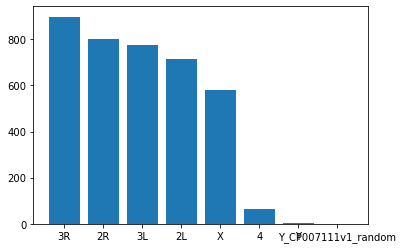

In [16]:
fig, ax = plt.subplots()
ax.bar( chr_k4.index, chr_k4 )
plt.show()

## Question 1: Tidy up K4

Plot chromosomes in order

In [17]:
coi = ['2L','2R','3L','3R','4','X']
chr_k4.loc[coi]

2L    713
2R    799
3L    773
3R    897
4      65
X     580
Name: chr, dtype: int64

Alphabetical order (manually)

In [18]:
chr_k4_alpha = ['2L','2R','3L','3R','4','X']

In [49]:
chr_k4 = chr_k4.sort_index()
chr_k4

2L                     713
2R                     799
3L                     773
3R                     897
4                       65
X                      580
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

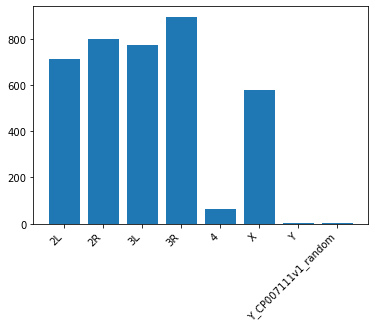

In [51]:
fig, ax = plt.subplots()
ax.bar(chr_k4.index,chr_k4)
plt.xticks(rotation=45, ha='right')
plt.show()

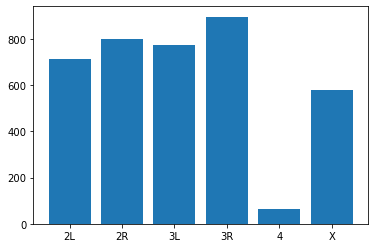

In [52]:
fig, ax = plt.subplots()
ax.bar(chr_k4_alpha,chr_k4.loc[coi])
plt.show()

Add a title

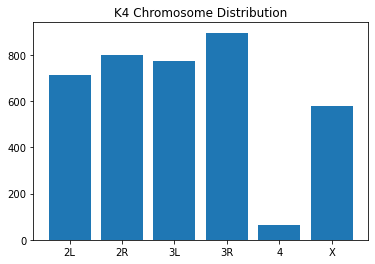

In [20]:
fig, ax = plt.subplots()
ax.bar(chr_k4_alpha, chr_k4.loc[coi])
ax.set_title('K4 Chromosome Distribution')
plt.show()

Set x and y labels

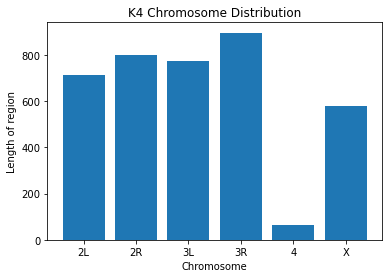

In [67]:
fig, ax = plt.subplots()
ax.bar(chr_k4_alpha, chr_k4.loc[coi])
ax.set_title('K4 Chromosome Distribution')
ax.set_xlabel('Chromosome')
ax.set_ylabel('Length of region')
plt.show()

## Question 2: Subplot K9 K27

In [22]:
bed_columns = ["chr", "start", "end"]
df_k9 = pd.read_table( "../../qbb2020/data/K9me3.bed", names=bed_columns )
df_k9

chr_k9 = df_k9.loc[:,"chr"]
chr_k9 = chr_k9.value_counts()
chr_k9

3L                     67
X                      61
2L                     53
3R                     51
2R                     50
4                      11
Y                       2
Y_DS483690v1_random     1
Name: chr, dtype: int64

In [23]:
coi_k9 = ['2L','2R','3L','3R','4','X']
chr_k9.loc[coi_k9]
chr_k9_alpha = ['2L','2R','3L','3R','4','X']

In [24]:
bed_columns = ["chr", "start", "end"]
df_k27 = pd.read_table( "../../qbb2020/data/K27me3.bed", names=bed_columns )
df_k27

chr_k27 = df_k27.loc[:,"chr"]
chr_k27 = chr_k27.value_counts()
chr_k27

2R               102
3R                90
3L                89
2L                80
X                 64
4                  5
Un_CP007080v1      1
Name: chr, dtype: int64

In [25]:
coi_k27 = ['2L','2R','3L','3R','4','X']
chr_k27.loc[coi_k27]
chr_k27_alpha = ['2L','2R','3L','3R','4','X']

In [26]:
chr_k27.loc[coi_k27]

2L     80
2R    102
3L     89
3R     90
4       5
X      64
Name: chr, dtype: int64

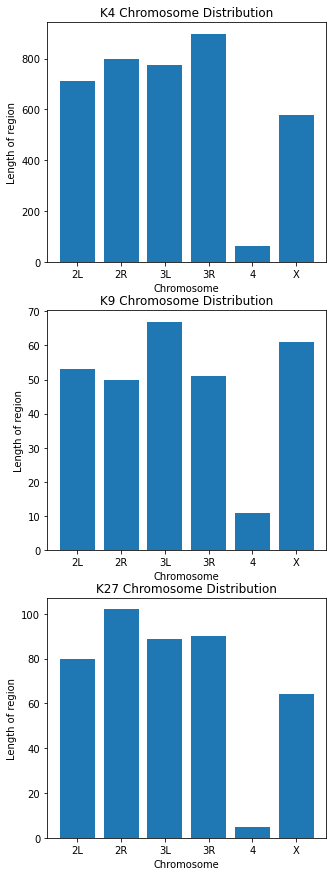

In [66]:
fig, ax = plt.subplots(nrows=3, figsize=(5,15))
ax[0].bar(chr_k4_alpha, chr_k4.loc[coi])
ax[0].set_title('K4 Chromosome Distribution')
ax[0].set_xlabel('Chromosome')
ax[0].set_ylabel('Length of region')

ax[1].bar(chr_k9_alpha, chr_k9.loc[coi_k9])
ax[1].set_title('K9 Chromosome Distribution')
ax[1].set_xlabel('Chromosome')
ax[1].set_ylabel('Length of region')

ax[2].bar(chr_k27_alpha, chr_k27.loc[coi_k27])
ax[2].set_title('K27 Chromosome Distribution')
ax[2].set_xlabel('Chromosome')
ax[2].set_ylabel('Length of region')

plt.show()

# Widths

## Demo

In [29]:
df_k4.loc[:,"width"] = df_k4.loc[:,"end"] - df_k4.loc[:,"start"]
df_k4

,chr,start,end,width
0,3L,15823270,15830715,7445
1,2R,11451787,11459612,7825
2,3R,21665759,21673392,7633
3,2R,20324929,20331038,6109
4,3R,19859679,19864278,4599
...,...,...,...,...
3825,3R,565835,566082,247
3826,2L,10439373,10442085,2712
3827,3R,4477321,4479529,2208
3828,3L,711347,711871,524


In [30]:
df_k4.describe()

,start,end,width
count,3.830000e+03,3.830000e+03,3830.000000
mean,1.232288e+07,1.232466e+07,1779.086684
std,7.711626e+06,7.711810e+06,1927.396833
min,5.082000e+03,6.616000e+03,1.000000
25%,6.069285e+06,6.070038e+06,388.250000
50%,1.128937e+07,1.128951e+07,1114.000000
75%,1.828572e+07,1.828875e+07,2389.000000
max,3.206773e+07,3.206836e+07,15877.000000


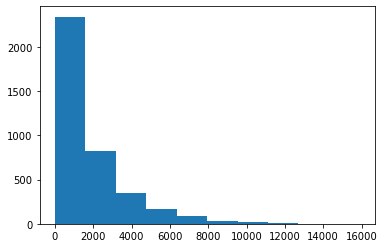

In [31]:
fig, ax = plt.subplots()
ax.hist( df_k4.loc[:,"width"] )
plt.show()

In [39]:
df_k9.loc[:,"width"] = df_k9.loc[:,"end"] - df_k9.loc[:,"start"]
df_k9

,chr,start,end,width
0,2L,5031,13131,8100
1,2L,356567,382831,26264
2,2L,582167,609431,27264
3,2L,975967,996567,20600
4,2L,1667067,1687931,20864
...,...,...,...,...
291,X,22708532,22720332,11800
292,X,22865032,22882596,17564
293,X,22981432,23009896,28464
294,X,23156000,23204164,48164


In [40]:
df_k27.loc[:,"width"] = df_k27.loc[:,"end"] - df_k27.loc[:,"start"]
df_k27

,chr,start,end,width
0,2L,5037,9637,4600
1,2L,322173,326237,4064
2,2L,365873,398837,32964
3,2L,498973,547373,48400
4,2L,579973,608037,28064
...,...,...,...,...
426,X,20310691,20388555,77864
427,X,20534591,20759055,224464
428,X,20824191,20835255,11064
429,X,20924791,20953755,28964


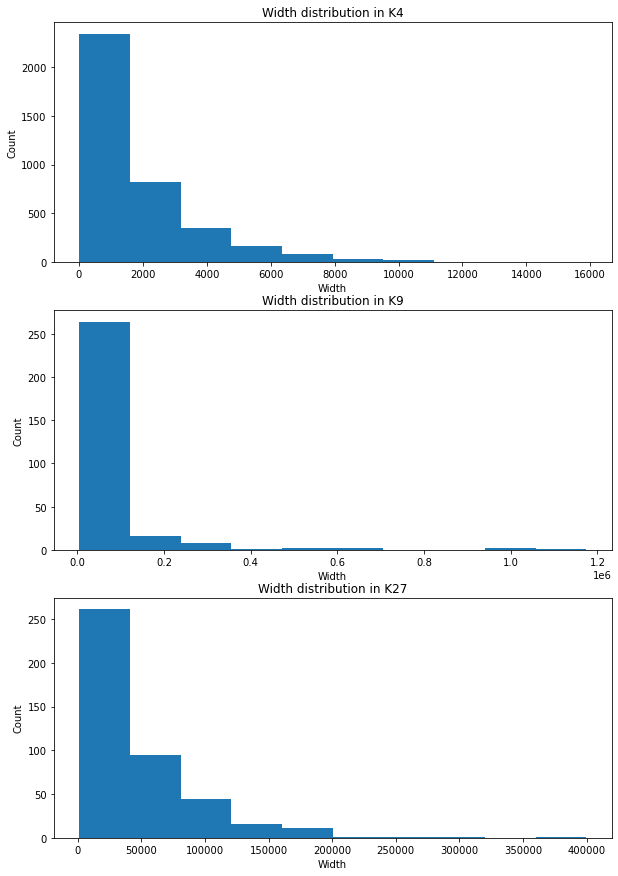

In [70]:
fig, ax = plt.subplots(nrows=3,figsize=(10,15))
ax[0].hist( df_k4.loc[:,"width"] )
ax[1].hist(df_k9.loc[:,"width"])
ax[2].hist(df_k27.loc[:,"width"])
ax[0].set_title("Width distribution in K4")
ax[1].set_title("Width distribution in K9")
ax[2].set_title("Width distribution in K27")
ax[0].set_xlabel("Width")
ax[1].set_xlabel("Width")
ax[2].set_xlabel("Width")
ax[0].set_ylabel("Count")
ax[1].set_ylabel("Count")
ax[2].set_ylabel("Count")
plt.show()

## Advanced: One plot

Can you find one or more ways to make an informative single plot with all three modifications?  Some suggestions:
- `np.log2()`
- `ax.hist( range, density, cumulative, histtype )`

# Summary

1. Introduce pandas
    - `read_table()`
    - `.columns` `.index` `.values`
    - `.shape`
    - `.loc[]`
    - `.value_counts()`
    - Vectorized operations
    - `.describe()`
1. More matplotlib
    - `ax.bar()`
    - `ax.hist()`